# Assignment 1 - Exploratory Data Analysis

## Instructions

For the First Assignment, we are going to be Performing Exploratory Data Analysis Using Python, R and Weka.

1. There are set of questions that may be similar for python and R but may be different for Weka.
2. The dataset used for Python/R are same but different for Weka.
3. For Task involving R use a different R notebook.
3. Each Task is presenting a challenge.

## Task 1: Python (40 Points)

Run this cell by default to load the dataset.

This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
import pandas as pd

movies_data = pd.read_csv("netflix_titles.csv")

movies_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Task 1A: 2 points
Display all the details about the dataset

In [2]:
#site referred :  https://pandas.pydata.org/
#All the details about the dataset
print('Details of the Dataset :  ')
movies_data.info()

Details of the Dataset :  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Task 1B: 3 points
1. Check for null values within each column.
2. Fill the values for more than 100 missing columns with certain label such as No Director, Country Unavailable, etc. Drop the rows for the rest missing columns.

In [3]:
#counting the null/missing values of particular columns
null_count = movies_data.isnull().sum()
print('Columns       Null values Count ')
print(null_count)

Columns       Null values Count 
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
#retrieveing the columns which have more than 100 missing values
missing_cols = null_count[null_count > 100].index
print('Columns with more than 100 missing value : ')
for i in missing_cols:
    print(i)

    
fill_values = {
    "director": "No Director",
    "country": "Country Unavailable",
    "cast":"Cast Unavailable"
}

# Using fill_values to fill the missing columns of more than 100
for col, fill_value in fill_values.items():
    if col in movies_data.columns:
        movies_data[col].fillna(fill_value, inplace=True)


Columns with more than 100 missing value : 
director
cast
country


In [5]:
# drop rows with less than 100 missing columns(See: if column has zero as missing columns then that won't be a missing column)
#dropping 10 date_added, 3 duration and 4 rating columns,whose values are missing
movies_data.dropna(inplace=True)

# Verify the changes
null_counts_after = movies_data.isnull().sum()
print(null_counts_after)
print()
print('Dataset after update: ')
movies_data

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Dataset after update: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast Unavailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,Cast Unavailable,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Director,Cast Unavailable,Country Unavailable,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Task 1C: 5 points
Display a two horizontal bar chart side by side for Top 10 countries with total number of movies and TV shows.

In [6]:
##Please Ignore this cell. This is a Practice cell


#Checking the top 10 countries of Movies and TV shows
# Split the countries column for movies
movies = movies_data[movies_data['type'] == 'Movie']
movies_countries = movies['country'].str.split(', ', expand=True).stack().reset_index(level=0).rename(columns={0: 'country'})
movies_countries_count = movies_countries['country'].value_counts().head(10)

# Split the countries column for TV shows
tv_shows_data = movies_data[movies_data['type'] == 'TV Show']
tv_shows_countries = tv_shows_data['country'].str.split(', ', expand=True).stack().reset_index(level=0).rename(columns={0: 'country'})
tv_shows_countries_count = tv_shows_countries['country'].value_counts().head(10)

# Display the top countries for movies
print("Top Countries for Movies:")
print(list(movies_countries_count.index))

# Display the top countries for TV shows
print("\nTop Countries for TV Shows:")
print(list(tv_shows_countries_count.index))


Top Countries for Movies:
['United States', 'India', 'United Kingdom', 'Country Unavailable', 'Canada', 'France', 'Germany', 'Spain', 'Japan', 'China']

Top Countries for TV Shows:
['United States', 'Country Unavailable', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'France', 'India', 'Taiwan', 'Australia']


In [7]:
#referred site : https://matplotlib.org/
import matplotlib.pyplot as plt

# Generate distinct rows for the countries with multiple values.
movies_data["country"] = movies_data["country"].str.split(", ")
movies_data_expanded = movies_data.explode("country")

# Filtering movies and TV shows separately
movies = movies_data_expanded[movies_data_expanded["type"] == "Movie"]
tv_shows = movies_data_expanded[movies_data_expanded["type"] == "TV Show"]

# Count the number of movies and TV shows for each country
movies_count = movies["country"].value_counts().head(10)
tv_shows_count = tv_shows["country"].value_counts().head(10)
print(movies_count)
print('-------------------')
print(tv_shows_count)

United States          2748
India                   962
United Kingdom          532
Country Unavailable     439
Canada                  319
France                  303
Germany                 182
Spain                   171
Japan                   119
China                   114
Name: country, dtype: int64
-------------------
United States          932
Country Unavailable    390
United Kingdom         271
Japan                  197
South Korea            170
Canada                 126
France                  90
India                   84
Taiwan                  70
Australia               64
Name: country, dtype: int64


Horizantal Graphs of Top 10 countries in Movies and Top 10 countries in TV Shows 


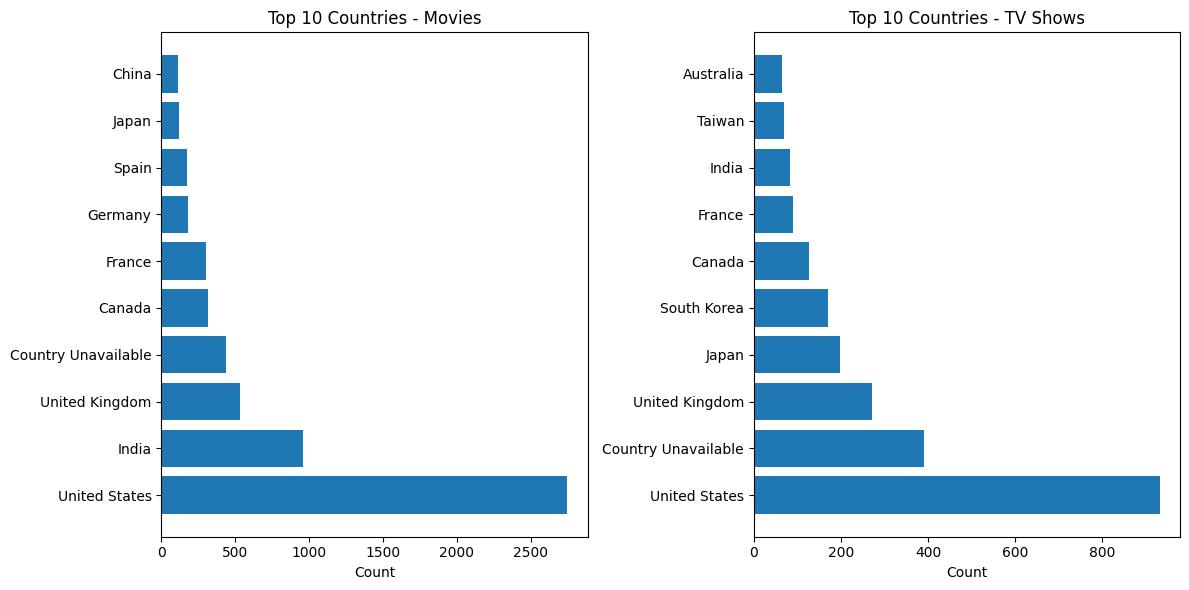

In [8]:

# Create a figure with two subplots
fig, (x1, x2) = plt.subplots(1, 2, figsize=(12, 6))

# Horizontal bar chart for movies count
x1.barh(movies_count.index, movies_count.values)
x1.set_title("Top 10 Countries - Movies")
x1.set_xlabel("Count")

# Horizontal bar chart for TV shows count
x2.barh(tv_shows_count.index, tv_shows_count.values)
x2.set_title("Top 10 Countries - TV Shows")
x2.set_xlabel("Count")

print('Horizantal Graphs of Top 10 countries in Movies and Top 10 countries in TV Shows ')
plt.tight_layout()
plt.show()


### Task 1D: 4 points

Print the first row based on the longest duration time of a movie from each country column with its director, date_added, release_year, duration of the movie and its description. 

In [9]:
len(movies_data_expanded['country'].unique())

128

In [10]:
# Generate distinct rows for the countries with multiple values.
movies_data_expanded

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast Unavailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,Cast Unavailable,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Director,Cast Unavailable,Country Unavailable,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
movies_data_expanded['duration'] = movies_data_expanded['duration'].astype(str)
movies_data_expanded['duration'] = pd.to_numeric(movies_data_expanded['duration'].str.extract('(\d+)')[0])

# Group the movies by country and find the movie with the longest duration for each country
longest_movies = movies_data_expanded.groupby('country').apply(lambda x: x.loc[x['duration'].idxmax()])

long_duration_movies = longest_movies[['country', 'director', 'date_added', 'release_year', 'duration', 'description']]
print(f"Number of Unique Countries in Dataset:{len(long_duration_movies)} ")

print()
print('----------------------------------')
for _,row in longest_movies.iterrows(): 
    if(row['country']==""):
        print('Country Unavailable')
    else:
        print("Country:", row['country'])
    print("Director:", row['director'])
    print("Date Added:", row['date_added'])
    print("Release Year:", row['release_year'])
    print("Duration (minutes):", row['duration'])
    print("Description:", row['description'])
    print()

Number of Unique Countries in Dataset:128 

----------------------------------
Country Unavailable
Director: Najwa Najjar
Date Added: July 30, 2021
Release Year: 2014
Duration (minutes): 103
Description: After a decade in prison, a Palestinian man with a dark secret returns to the West Bank and searches for the daughter he lost long ago.

Country: Afghanistan
Director: Pieter-Jan De Pue
Date Added: January 1, 2017
Release Year: 2016
Duration (minutes): 84
Description: In the rugged mountains of Afghanistan, armed bands of young boys survive by scavenging for old land mines, mining lapis lazuli and trading in opium.

Country: Albania
Director: Antonio Morabito
Date Added: May 4, 2018
Release Year: 2018
Duration (minutes): 105
Description: Threatened by creditors, a newly unemployed man agrees to work for a debt collector, but soon discovers his deal with the devil has unexpected costs.

Country: Algeria
Director: Youssef Chahine
Date Added: June 18, 2020
Release Year: 1979
Duration (min

### Task 1E: 4 points
Display the titleof the movie, its director, the date it was added to the platform and the date it was officially released where the official release date and the date it was added to the plafform has same year.

In [12]:
# Filter the dataset for movies only
movies_only = movies_data[movies_data['type'] == 'Movie']

# Filter the movies where the release year and date added year are the same
movies_same_year = movies_only[movies_only['release_year'] == movies_only['date_added'].str[-4:].astype(int)]

# Select the desired columns for the result
same_year_result = movies_same_year[['title', 'director', 'date_added', 'release_year']]

# Print the result
print('Movies that added to platform in that same year of their release :')
same_year_result


Movies that added to platform in that same year of their release :


,title,director,date_added,release_year
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021
9,The Starling,Theodore Melfi,"September 24, 2021",2021
12,Je Suis Karl,Christian Schwochow,"September 23, 2021",2021
13,Confessions of an Invisible Girl,Bruno Garotti,"September 22, 2021",2021
18,Intrusion,Adam Salky,"September 22, 2021",2021
...,...,...,...,...
8765,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","June 22, 2017",2017
8781,Yo-Kai Watch: The Movie,Mark Risley,"December 1, 2016",2016
8782,Yoga Hosers,Kevin Smith,"December 2, 2016",2016
8786,You Can Tutu,James Brown,"December 31, 2017",2017


### Task 1F: 4 points
Display Director, the release year and number of movies and TV Shows directed by that director within a year and sort the results from highest.

In [13]:
# Filter the dataset for movies and TV shows separately
movies = movies_data[movies_data['type'] == 'Movie']
tv_shows = movies_data[movies_data['type'] == 'TV Show']

# Group the movies by director and release year
movies_grouped = movies.groupby(['director', 'release_year']).size().reset_index(name='movie_count')

# Group the TV shows by director and release year
tv_shows_grouped = tv_shows.groupby(['director', 'release_year']).size().reset_index(name='tv_show_count')

# Merge the movie and TV show counts for each director and release year
Director_result = movies_grouped.merge(tv_shows_grouped, on=['director', 'release_year'], how='outer').fillna(0)

# Sort the result by the total count in descending order
Director_result['total_count'] = Director_result['movie_count'] + Director_result['tv_show_count']
Director_result_sorted = Director_result.sort_values('total_count', ascending=False)

# Print the result
print('release year and number of movies and TV Shows directed by that director within a year : ')
Director_result_sorted


release year and number of movies and TV Shows directed by that director within a year : 


,director,release_year,movie_count,tv_show_count,total_count
3749,No Director,2020,22.0,383.0,405.0
3748,No Director,2019,35.0,366.0,401.0
3747,No Director,2018,30.0,356.0,386.0
3750,No Director,2021,25.0,270.0,295.0
3746,No Director,2017,18.0,240.0,258.0
...,...,...,...,...,...
2009,Ishi Rudell,2016,1.0,0.0,1.0
2008,Ishaya Bako,2019,1.0,0.0,1.0
2007,Ishaya Bako,2017,1.0,0.0,1.0
2006,Ishaya Bako,2015,1.0,0.0,1.0


### Task 1G: 3 points
Display the title of the movie/TV shows, the Director, the date it was added to netflix and the category it was listed in from the data which belongs to Documentary/Docuseries category.

In [14]:
# Filter the dataset for Documentary/Docuseries category
documentaries = movies_data[movies_data['listed_in'].str.contains('Documentaries|Docuseries')]

# Select the desired columns for the result
doc_result = documentaries[['title', 'director', 'date_added', 'listed_in']]

# Print the result
print('Movie/TV Shows listed in Documentary/Docuseries category : ')
doc_result


Movie/TV Shows listed in Documentary/Docuseries category : 


,title,director,date_added,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",Documentaries
3,Jailbirds New Orleans,No Director,"September 24, 2021","Docuseries, Reality TV"
10,"Vendetta: Truth, Lies and The Mafia",No Director,"September 24, 2021","Crime TV Shows, Docuseries, International TV S..."
14,Crime Stories: India Detectives,No Director,"September 22, 2021","British TV Shows, Crime TV Shows, Docuseries"
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams","September 22, 2021","Documentaries, International Movies"
...,...,...,...,...
8746,Winnie,Pascale Lamche,"February 26, 2018","Documentaries, International Movies"
8755,Women Behind Bars,No Director,"November 1, 2016","Crime TV Shows, Docuseries"
8756,Woodstock,Barak Goodman,"August 13, 2019","Documentaries, Music & Musicals"
8758,World's Busiest Cities,No Director,"February 1, 2019","British TV Shows, Docuseries"


### Task 1H : 4 points

Display title, the date it was added to the plaform, type of category it was listed in and its description for Family Dramas.

Hint: Use Description to look for type of Drama.

In [15]:

# Dramas:
dramas = movies_data[movies_data['listed_in'].str.contains("Dramas", case=False)]

print(len(dramas))

dramas


3188


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",[Country Unavailable],"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","[Germany, Czech Republic]","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",[India],"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,No Director,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",[Pakistan],"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","[United Arab Emirates, Jordan]","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


In [16]:

# Filter for Family Dramas
family_dramas = dramas[dramas["description"].str.contains("Family", case=False)]

# Select desired columns
family_drama_result = family_dramas[["title", "date_added", "listed_in", "description"]]

# Display the result
print('List of the Family dramas:')

family_drama_result


List of the Family dramas:


,title,date_added,listed_in,description
12,Je Suis Karl,"September 23, 2021","Dramas, International Movies",After most of her family is murdered in a terr...
84,Omo Ghetto: the Saga,"September 10, 2021","Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...
103,Shadow Parties,"September 6, 2021","Dramas, International Movies, Thrillers",A family faces destruction in a long-running c...
118,Gurgaon,"September 2, 2021","Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...
128,Agatha Christie's Crooked House,"September 1, 2021","Dramas, International Movies, Thrillers",When a detective investigates the death of his...
...,...,...,...,...
8743,Wildlife,"September 1, 2020","Dramas, Independent Movies",A teen’s life in 1960 Montana grows complicate...
8750,Winter's Bone,"March 1, 2019","Dramas, Independent Movies","In this unflinching noir drama, a resilient te..."
8771,Yaara O Dildaara,"November 1, 2017","Dramas, International Movies, Music & Musicals",The patriarch of a wealthy family with one ind...
8788,You Carry Me,"July 1, 2016","Dramas, International Movies","A soap opera producer, director and makeup art..."


### Task 1I: 5 points

Plot the Distribution of TV shows based on their number of seasons.(horizontal bar chart)
1. Less than 3 seasons
2. 3 Seasons
3. 4 Seasons
4. 5 to less than 10 seasons.
5. 10 or more seasons.

Less than 3 seasons          2212
3 seasons                     198
4 seasons                      94
5 to less than 10 seasons     146
10 or more seasons             14
Name: season_category, dtype: int64


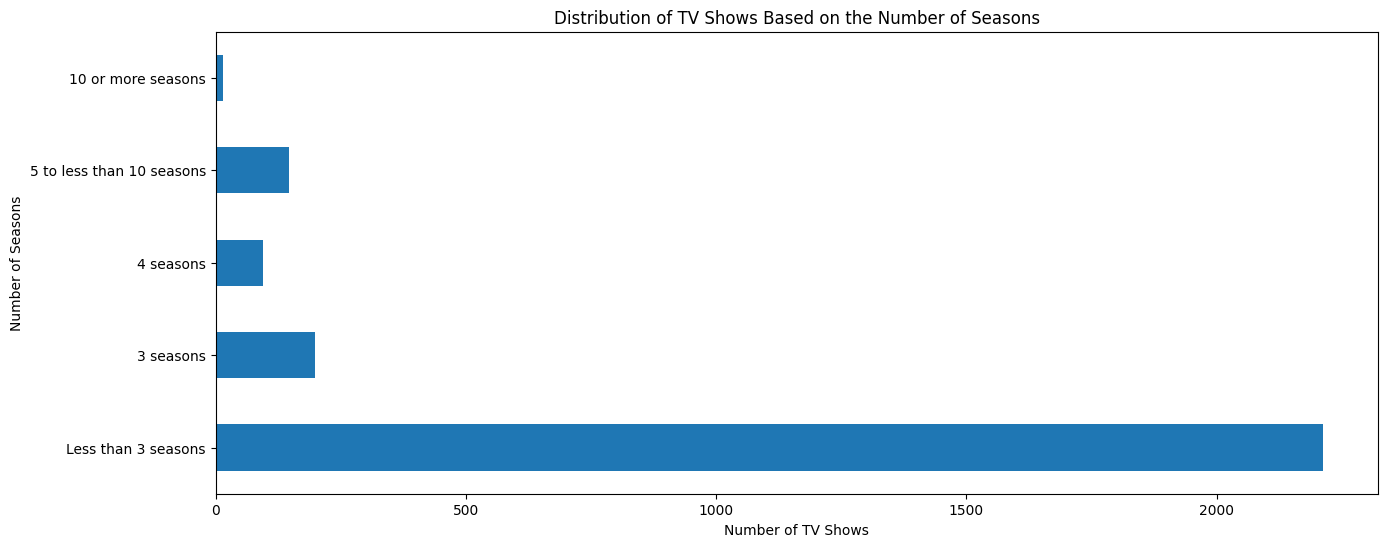

In [17]:

# Copying only TV Shows from movies_data
tv_shows = movies_data[movies_data["type"] == "TV Show"].copy()  

#getting the number of seasons
tv_shows["number_of_seasons"] = tv_shows["duration"].str.extract(r"(\d+)").astype(float)

# Grouping Tv show's seasons into categories
bins = [0, 3, 4, 5,10, float("inf")]
labels = [
    "Less than 3 seasons",
    "3 seasons",
    "4 seasons",
    "5 to less than 10 seasons",
    "10 or more seasons"
]
tv_shows["season_category"] = pd.cut(tv_shows["number_of_seasons"], bins=bins, labels=labels, right=False)

# Count the number of TV shows in each season category
season_counts = tv_shows["season_category"].value_counts().sort_index()

# Print the Season Counts
print(season_counts)
# Create a horizontal bar chart
plt.figure(figsize=(15, 6))
tv_shows["season_category"].value_counts().sort_index().plot.barh()
plt.xlabel("Number of TV Shows")
plt.ylabel("Number of Seasons")
plt.title("Distribution of TV Shows Based on the Number of Seasons")
plt.show()


### Task 1J: 6 points

Display a side by side pie chart where it shows different rating a movie and a TV show belongs to.

Movie:
1. Uncut/Not rated
2. Restricted
3. Parentel guidance
4. General audience
5. Adults only

TV Show:
1. All Children
2. Older Children
3. Parentel Presence
4. General audience
5. Mature

In [18]:
import matplotlib.pyplot as plt


In [19]:

# Movie Ratings
movie_ratings = ["NR", "R", "PG", "G", "NC-17"]

# Filter movies with specific ratings
filtered_movies = movies_data[(movies_data["type"] == "Movie") & (movies_data["rating"].isin(movie_ratings))]

# TV Show Ratings
tv_show_ratings = ["TV-Y", "TV-Y7", "TV-PG", "TV-G",  "TV-MA"]

# Filter TV shows with specific ratings
filtered_tv_shows = movies_data[(movies_data["type"] == "TV Show") & (movies_data["rating"].isin(tv_show_ratings))]

# Display the filtered movies and TV shows
print("Filtered Movies:")
print(filtered_movies)
print('------------------------------------')
print("\nFiltered TV Shows:")
print(filtered_tv_shows)





Filtered Movies:
     show_id   type                             title  \
6         s7  Movie  My Little Pony: A New Generation   
41       s42  Movie                              Jaws   
42       s43  Movie                            Jaws 2   
43       s44  Movie                            Jaws 3   
45       s46  Movie            My Heroes Were Cowboys   
...      ...    ...                               ...   
8792   s8793  Movie                       Young Tiger   
8793   s8794  Movie              Yours, Mine and Ours   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   

                           director  \
6     Robert Cullen, José Luis Ucha   
41                 Steven Spielberg   
42                   Jeannot Szwarc   
43                        Joe Alves   
45                      Tyler Greco   
...                             ...   
8792                     

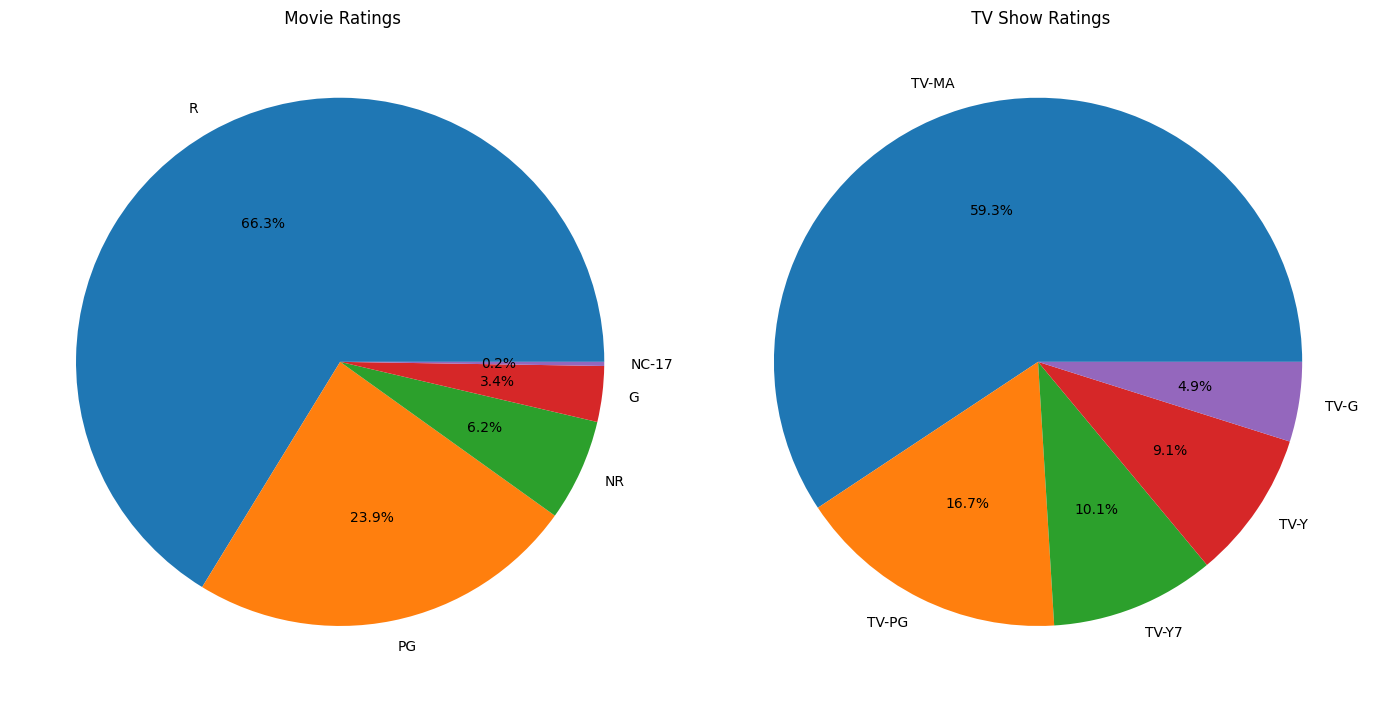

In [20]:
# Count the number of movies and TV shows for each rating category
movie_rating_counts = filtered_movies["rating"].value_counts()
tv_show_rating_counts = filtered_tv_shows["rating"].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for movie ratings
ax1.pie(movie_rating_counts, labels=movie_rating_counts.index, autopct='%1.1f%%')
ax1.set_title(" Movie Ratings")

# Plot the pie chart for TV show ratings
ax2.pie(tv_show_rating_counts, labels=tv_show_rating_counts.index, autopct='%1.1f%%')
ax2.set_title(" TV Show Ratings")

plt.tight_layout()
fig.set_size_inches(14, 7)
plt.show()


### Programming Assignment Details

1. If using any resource (books, internet), please make sure that you cite it within that cell.
2. Do not rename the dataset_files.
3. Include the Images from the Weka analysis in the submission folder with each image named with the Task(eg: Task3B, Task3C, etc).

References:
Official Python documentation: https://docs.python.org/3/
Official Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/

###  Submission details
Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819_python.ipynb, abc_1234_def_5678_xyz3819_R.ipynb

### NOTE: Only one team member will submit the file.